# Исследование продаж компьютерных игр

### **Описание проекта**

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:**   Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные до 2016 года. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB была основана в 1994 году. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

**Исследование будет состоять из следующих этапов:**
 
1. Изучение общей информации о данных. 

2. Подготовка данных

3. Исследовательский анализ данных

4. Составление портрета пользователя каждого региона

5. Проверка гипотезы

6. Общий вывод

### 1. Откроем файл с данными и изучим общую информацию

In [1]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import re
from mpl_toolkits.mplot3d import Axes3D


Отключаем полосу прокрутки (скроллбар) при вводах:

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Открываем данные
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:/my/Яндекс Практикум Курс Data Scientist/SPRINT 8 MODUL 1/MODUL 1 MY/games.csv')


In [4]:
# Первые 5 строк таблицы данных
display(data.head(), '\n\n', data.tail()) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


'\n\n'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# Общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


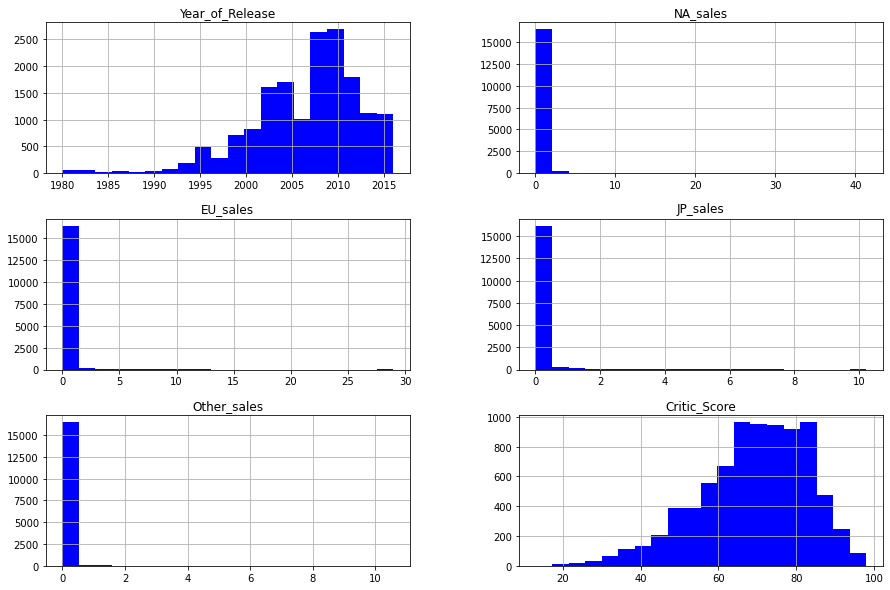

In [6]:
# Гистограммы числовых признаков данных
data.hist(figsize=(15, 10), bins = 20, color = 'blue')
plt.show()

In [7]:
# Статистики числовых признаков данных
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# Смотрим налчиче дубликатов
data.duplicated().sum()

0

In [9]:
# Посмотрим уникальные значения в признаках, где это возможно 
list(map(lambda x: print(f' {x} \n{data[x].unique()}), \n'), \
         data.columns.difference([data.columns[0], data.columns[4], data.columns[5], data.columns[6], data.columns[7]])))

 Critic_Score 
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]), 

 Genre 
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]), 

 Platform 
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']), 

 Rating 
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']), 

 User_Score 
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9

[None, None, None, None, None, None]

In [10]:
# Доля значений tbd в столбце User_Score
print('Доля значений tbd в столбце User_Score:', round(data.query("User_Score == 'tbd'")["User_Score"].count()/len(data["User_Score"]),2), '%')

Доля значений tbd в столбце User_Score: 0.15 %


### **Вывод 1**  

Всего объектов 16715 (строки) и 11 признаков их описывающих (колонки).  
Набор и содержание признаков соответствует целям исследования.  
Названия колонок несут содержательный смысл.  
Индексы без пропусков.   
Явных дубликатов нет.   

В данных присутствуют  
- разный регистр в названиях колонок
- пропуски в 6 признаках (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating)  
- некорректные типы данных у 2 признаков (Year_of_Release, User_Score)   
- аномальное значение 'tbd' в 15% значений столбца User_Score
- категориальные и количественные признаки.  

Данные представлены за период с 1980 по 2016 года включительно, наименьше количество игр было выпущено до 1998 года, наибольшее  - за период с 2007 по 2011 год.   
Можно предположить, что 15% игр, не имеющих оценок ползователей - те, у которых в значениях столбца `User_Score` указано To Be Determined (будет определено), - очень давнего года выпуска и\или недавно появившиеся: в обоих случаях возможно еще не собирались оценки от пользователей, либо по причине отсутствия общедоступного интернета у пользователей, либо по причине отсутствия накопившейся статистики от пользователей для недавно выпущенных игр. Не исключено, что не все пользователи пожелали оценить игру.

### 2.  Подготовка данных

#### 2.1 Заменим названия столбцов (приведем к нижнему регистру)

In [11]:
# Приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [12]:
# Проверяем результат корректность переименования столбцов
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### 2.2 Посмотрим структуру пропусков и обработаем их

In [13]:
# Заменим неопределенные оценки 'tbd' в столбце user_score на nan для удобства дальнейшей их обработки, не будем удалять 15%
# данных, позже оценки еще могут быть получены
data = data.replace({'user_score' : 'tbd' }, np.nan)

# Проверяем замену
data.query('user_score == "tbd"')['user_score'].sum()

0

In [14]:
# Посмотрим структуру пропусков
na = data.isna().sum()
na_rate = round(data.isna().mean()*100,2)

display(pd.DataFrame({'Количество пропусков': na, '% пропусков':na_rate}).style.format('{:.2f}').background_gradient("Reds"))
print("Всего колонок: {}, без пропусков: {}, с пропусками: {}".format(len(na), (na == 0).sum(), (na != 0).sum() ))


,Количество пропусков,% пропусков
name,2.00,0.01
platform,0.00,0.00
year_of_release,269.00,1.61
genre,2.00,0.01
na_sales,0.00,0.00
eu_sales,0.00,0.00
jp_sales,0.00,0.00
other_sales,0.00,0.00
critic_score,8578.00,51.32
user_score,9125.00,54.59


Всего колонок: 11, без пропусков: 5, с пропусками: 6


In [15]:
# Удалим пропуски в колонках name, year_of_release и genre, т.к. их количество в каждой менее 1,7% 
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['year_of_release'])
data = data.dropna(subset = ['genre'])

In [16]:
# Заменим пропуски в колонках critic_score и user_score на -1
data.loc[data['critic_score'].isna(), 'critic_score'] = -1
data.loc[data['user_score'].isna(), 'user_score'] = -1

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [18]:
data['critic_score'].median(), data['user_score'].median()


(-1.0, -1.0)

In [19]:
data['critic_score'].head()

0    76.0
1    -1.0
2    82.0
3    80.0
4    -1.0
Name: critic_score, dtype: float64

In [20]:
#data.groupby('Platform')['Critic_Score'].describe().head()
#data.groupby('Platform')['Critic_Score'].max() 

In [21]:
# Заменим пропуски в колонке rating  на слово 'lost',т.к. их большое количество (более 40% в столбце) 
# и удаление может исказить результаты исследования 
data = data.replace({'rating':{np.nan: 'lost'}})

#### 2.3 Преобразуем данные в нужные типы

In [22]:
# Тип колонки year_of_release преобразуем из float в int
data['year_of_release'] = data['year_of_release'].astype('int')

In [23]:
# Тип колонки user_score преобразуем из object в float
data['user_score'] = data['user_score'].astype('float') 

#### 2.4 Посчитаем суммарные продажи во всех регионах 

In [24]:
# Добавим столбец суммарных продаж во всех регионах total_sales
data['total_sales'] = data[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis = 1)

In [25]:
# Проверяем наличие нового столбца total_sales в таблице и его значение
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


#### 2.5  Результирующая информация после обработки данных

In [26]:
# Посмотрим структуру пропусков после обработки
na = data.isna().sum()
na_rate = round(data.isna().mean()*100,2)

display(pd.DataFrame({'Количество пропусков': na, '% пропусков':na_rate}).style.format('{:.2f}').background_gradient("Reds"))
print("Всего колонок: {}, без пропусков: {}, с пропусками: {}".format(len(na), (na == 0).sum(), (na != 0).sum() ))

,Количество пропусков,% пропусков
name,0.00,0.00
platform,0.00,0.00
year_of_release,0.00,0.00
genre,0.00,0.00
na_sales,0.00,0.00
eu_sales,0.00,0.00
jp_sales,0.00,0.00
other_sales,0.00,0.00
critic_score,0.00,0.00
user_score,0.00,0.00


Всего колонок: 12, без пропусков: 12, с пропусками: 0


In [27]:
# Посмотрим тип данных после их корректировки и наличие нового добавленного столбца суммарных продаж игр
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### **Вывод 2**  

Провели обработку данных:  
- разный регистр в названиях колонок привели к нижнему регистру
- заменили на nan неопределенные оценки 'tbd' (To Be Determined - будет определено или подлежит определению), составляющие 15% значений столбца `user_score` для удобства дальнейшей их замены на медианные значения, чтобы не удалять 15% данных,т.к позже оценки еще могут быть получены
- пропуски в 6 признаках (name, year_of_release, genre, critic_score, user_score, rating), которые могли изначально присутствовать в данных, либо могли произойти при загрузке, выгрузке или объединении архивных данных   
    - удалили в столбцах `name`, `year_of_release`, `genre` по причине их незначительного количества (до 2% в каждом из
      столбцов, эти пропуски могли произойти по технической причине, в т.ч. при объединении архивов данных из старых и новых  хранилищ)  
    - заменили на медианные значения групп игр в столбцах `critic_score` и `user_score`, т.к. удаление более 40% пропусков в каждом из этих столбцов может исказить результаты исследования, эти пропуски могли произойти по причине, что игра слишком старая и в то время отсутствовала возможность собирать статистику - еще не собирались оценки от пользователей, либо по причине отсутствия общедоступного интернета у пользователей; либо пропуски по причине, что игра неактуальная - совсем непопулярна и ее закрывают даже не "распробовав" (слишком жуткая, неинтересная или сложная для понимания ее правил), слишком новая - у недавно выпущенной игры не накопилась еще статистика от пользователей, возможно поэтому и возникли значения 'tbd' в столбце; еще причина -  не исключено, что не все пользователи пожелали оценить игру)  
    - заменили пропуски в колонке `rating` на слово 'lost',т.к. их большое количество (более 40% в столбце) 
      и удаление может исказить результаты исследования 
- заменили некорректные типы данных у 2 признаков 
    - в колонке `year_of_release` преобразовали из float в int
    - в колонке `user_score`- из object в float
- добавили в исходную таблицу столбец суммарных продаж во всех регионах `total_sales`
  


###  3. Исследовательский анализ данных

#### 3.1  Cколько игр выпускалось в разные годы

In [28]:
# Группируем количество игр по годам
years_release_all =  data.groupby('year_of_release').agg(count=('name', pd.Series.count), unique = ('name', pd.Series.nunique))
years_release_all[7:15]

,count,unique
year_of_release,,
1987,16,16
1988,15,15
1989,17,17
1990,16,16
1991,41,40
1992,43,41
1993,60,59
1994,121,117


In [29]:
# Cтатистика по количеству выпускаемых игр
print(years_release_all.describe())

             count       unique
count    37.000000    37.000000
mean    444.432432   329.594595
std     451.604334   319.135504
min       9.000000     9.000000
25%      36.000000    36.000000
50%     338.000000   297.000000
75%     762.000000   546.000000
max    1427.000000  1039.000000


In [30]:
years_release = years_release_all['unique']
years_release[:5]

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: unique, dtype: int64

In [31]:
# Количество вускаемых игр по годам и их доля к максимальному количетву 1427 в 2008г.
to_max = 100*years_release/years_release.max()
display(pd.DataFrame({'release':years_release,'%_to_max':to_max}).sort_index(ascending = False))

,release,%_to_max
year_of_release,,
2016,297,28.585178
2015,362,34.841193
2014,319,30.702599
2013,335,32.242541
2012,446,42.925890
2011,779,74.975938
2010,900,86.621752
2009,1001,96.342637
2008,1039,100.000000


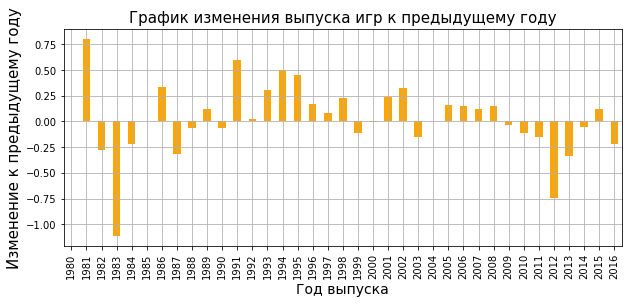

In [32]:
# График изменения выпуска игр к прдыдущему году
((years_release - years_release.shift(1))/years_release).plot(kind='bar', grid=True, color = 'orange', figsize=(10,4))
plt.title('График изменения выпуска игр к предыдущему году',fontsize=15)
plt.xlabel('Год выпуска',fontsize=14)
plt.ylabel('Изменение к предыдущему году',fontsize=15)
plt.show()

In [33]:
# Год, с которого доля выпуска игр к максимальному значению стала превышать 10% 
actual_year = years_release[to_max > 10].index.min()
print('Год начала активного развития индустрии игр:', actual_year)

Год начала активного развития индустрии игр: 1994


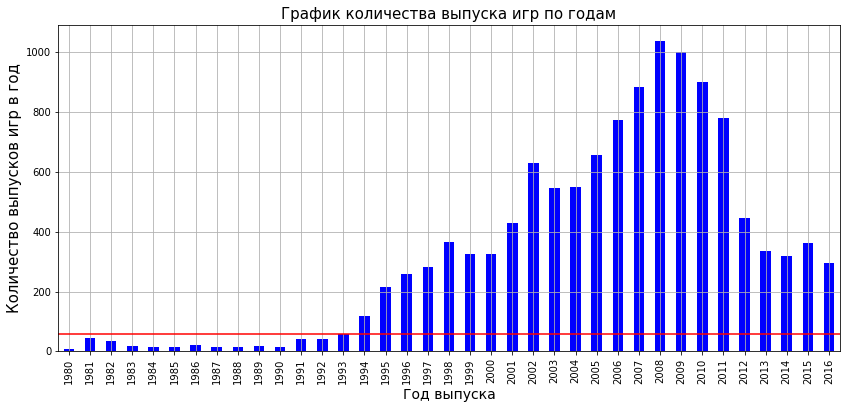

In [34]:
# График количества выпуска игр по годам
px = years_release.sort_index(ascending = True).plot(kind='bar', grid=True, color = 'blue', figsize=(14,6))
px.axhline(years_release[actual_year-1], color='Red')
plt.title('График количества выпуска игр по годам',fontsize=15)
plt.xlabel('Год выпуска',fontsize=14)
plt.ylabel('Количество выпусков игр в год',fontsize=15)
plt.show()

####  Вывод 3.1  
В более ранние годы игр выпускалось меньше. С 1994 года началась активная тенденция практически ежегодного увеличения количества выпускаемых игр. С 1991г. - неактивный прирост.  
Рост наблюдается до 2009 года.  
В период 1994-2009 небольшое снижение продаж было в 1999, 2003 и 2004 годах.   
Пик релизов приходился на 2008-2009 годы, после которых выпуск начал ежегодно снижаться вплоть до 2016г. за исключением 2015г., возможно, из-за конкуренции со стороны мобильных игр.

#### 3.2 Изменения продаж по платформам

In [35]:
# Суммарные продажи в разбивке по платформам
platforms_sale = data.groupby('platform') \
    .agg(min_year_of_release=('year_of_release', np.min), \
    max_year_of_release=('year_of_release', np.max), total_sales=('total_sales', np.sum), \
    user_score=('user_score', np.sum)) \
    .sort_values(by = 'total_sales', ascending = False)

,min_year_of_release,max_year_of_release,total_sales,user_score
platform,,,,
PS2,2000,2011,1233.56,8395.9
X360,2005,2016,961.24,6026.3
PS3,2006,2016,931.34,5340.5
Wii,2006,2016,891.18,2954.4
DS,1985,2013,802.78,1986.6
PS,1994,2003,727.58,218.5
PS4,2013,2016,314.14,1599.3
GBA,2000,2007,312.88,1365.0
PSP,2004,2015,289.53,2250.0


count      31.000000
mean      284.334516
std       343.954144
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total_sales, dtype: float64

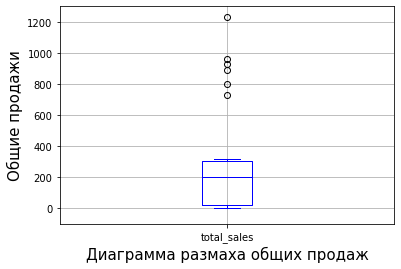

In [36]:
# Cтатистика продаж суммарно по всем платформам
display(platforms_sale, platforms_sale['total_sales'].describe())

# Диаграмма размаха общих продаж
pd.DataFrame(platforms_sale['total_sales']).boxplot(color = 'blue') 
plt.ylim(-100, 1300)
plt.xlabel('Диаграмма размаха общих продаж',fontsize=15)
plt.ylabel('Общие продажи',fontsize=15)
plt.show()

In [37]:
# Характерный срок появления новых и исчезновения старых платформ
print('Характерный срок появления новых и исчезновения старых платформ:', round((platforms_sale["max_year_of_release"] - platforms_sale["min_year_of_release"]).mean(),0))

Характерный срок появления новых и исчезновения старых платформ: 8.0


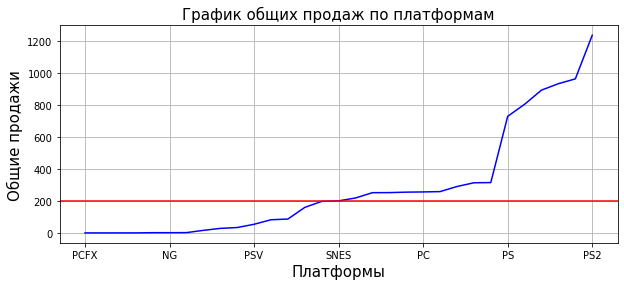

 Выбранный квартиль общих продаж: 200.0


In [38]:
# График общих продаж по платформам
px = platforms_sale['total_sales'].sort_values(ascending = True).plot(grid=True, color = 'blue', figsize=(10,4))
               
choised_quantile = platforms_sale['total_sales'].quantile(q=0.5) # квартиль общих продаж (возможно использование любого перцентеля)
px.axhline(choised_quantile, color='Red')
plt.title('График общих продаж по платформам',fontsize=15)    
plt.xlabel('Платформы',fontsize=15)
plt.ylabel('Общие продажи',fontsize=15)
plt.show()
print(f' Выбранный квартиль общих продаж: {round(choised_quantile,0)}')

In [39]:
# Платформы с наибольшими суммарными продажами - пордаж более значения 3 квартиля
best_platforms = platforms_sale.query('total_sales >= @choised_quantile')['total_sales']
best_platforms.sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
Name: total_sales, dtype: float64

In [40]:
# Ранний год выпуска из лучших платформ для построения распределения по годам
best_platforms_year = data.query('platform in @best_platforms.index').groupby('platform') \
    .agg(min_year_of_release=('year_of_release', np.min))
   
start_period = best_platforms_year['min_year_of_release'].min()
print (f' Ранний год выпуска из лучших платформ для построение распределения по годам: {start_period}')

 Ранний год выпуска из лучших платформ для построение распределения по годам: 1983


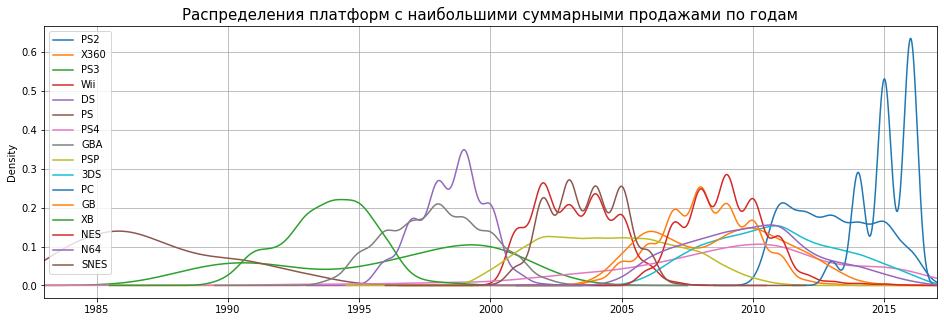

In [41]:
# Построение распределения платформ с наибольшими суммарными продажами по годам
platforms = data.query('platform in @best_platforms.index')[['year_of_release', 'platform']].groupby('platform')
for platform_name, platform in platforms:
    platform['year_of_release'].plot(kind = 'kde',  grid = True, xlim = (start_period, 2017), figsize = (16,5), legend = True)
    plt.legend(best_platforms.index)
plt.title('Распределения платформ с наибольшими суммарными продажами по годам',fontsize=15)    
plt.show()

In [42]:
# Сколько игр на платформе PS3
ps3_games =  data.query('platform == "PS3"')['name'].count()
print(ps3_games)

1306


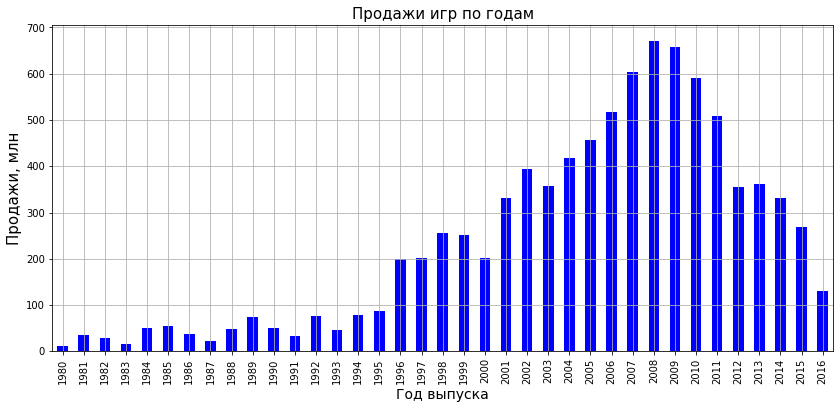

In [43]:
# График продаж по годам
data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, color = 'blue', figsize=(14,6))
px.axhline(years_release[actual_year-1], color='Red')
plt.title('Продажи игр по годам',fontsize=15)
plt.xlabel('Год выпуска',fontsize=14)
plt.ylabel('Продажи, млн',fontsize=15)
plt.show()

####  Вывод 3.2  
Характерный срок существования игр на рынке составил в среднем 8 лет.
График наилучших по продажам платформ отражает перод, за который появляются новые и исчезают старые платформы: платформы существуют на рынке от 7 до 11 лет. Пик приходится на 4й-5й год.  

Исходя из проведенного анализа, можно предположть, что актуальный период, позволяющий построить прогноз на 2017 год, стоит выбрать равным с 2013 по 2016 года, так как у наиболее прибыльных платформ с этого года заканчивался их жизненный цикл - они уже не отразят все основные параметры успешных игр, более актуальные факторы в то время могут быть уже неактуальны сегодня, ведь упадок платформ не может быть безосновательным. Также с 2013г. начинается новый цикл у более современной успешной платформы PS.  

Наиболее современные, пусть и чуть менее успешные, чем некоторые успешные ушедшие с рынка к 2013 году, платформы помогут более точно выявить определяющие успешность игры закономерности, поэтому для целей дальнейшего исследования выбираем период с 2013г. по 2016г.       


#### 3.3 Выбираем несколько потенциально прибыльных платформ за период с 2013 по 2016 года.

In [44]:
# Общие продажи платформ за выбранный период: у которых последний релиз был после 2012 года
actual_platform_sales = data.query('year_of_release >= 2013').groupby('platform').agg(total_sales = ('total_sales', np.sum)).sort_values(by= 'total_sales', ascending=False)
print('Платформы за период с 2013 по 2016 года ключчительно')
actual_platform_sales

Платформы за период с 2013 по 2016 года ключчительно


,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


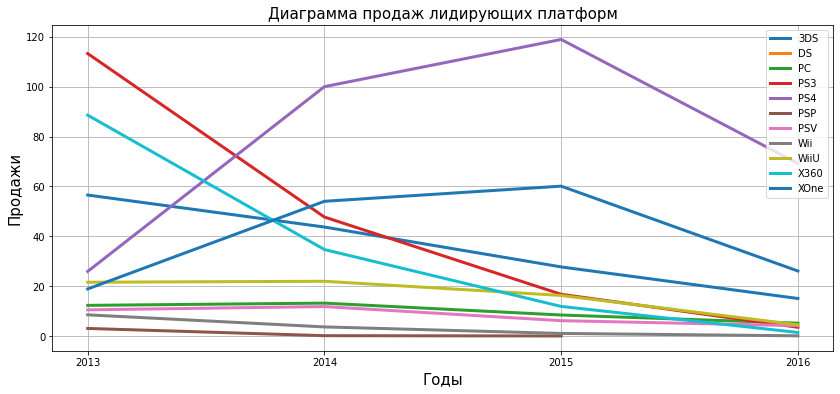

In [45]:
# Диаграмма продаж платформ актуального периода 
platform_cycle = data.query('year_of_release >= 2013')
x_years = platform_cycle.groupby('year_of_release').count().index.values
platform_cycle_groups = platform_cycle.groupby(['year_of_release', 'platform'])['total_sales'].sum()
sales_grouppedby_platforms = platform_cycle_groups.groupby('platform')
sales_grouppedby_platforms.plot(kind = 'line', grid = True, figsize = (14,6), linewidth = 3, legend = True)
plt.legend(sales_grouppedby_platforms.groups.keys())
plt.title('Диаграмма продаж лидирующих платформ',fontsize=15)   
plt.xlabel('Годы',fontsize=15)
plt.ylabel('Продажи',fontsize=15)
#print(x_years)
xi = list(range(len(x_years)))
plt.xticks(xi, x_years)
plt.show()

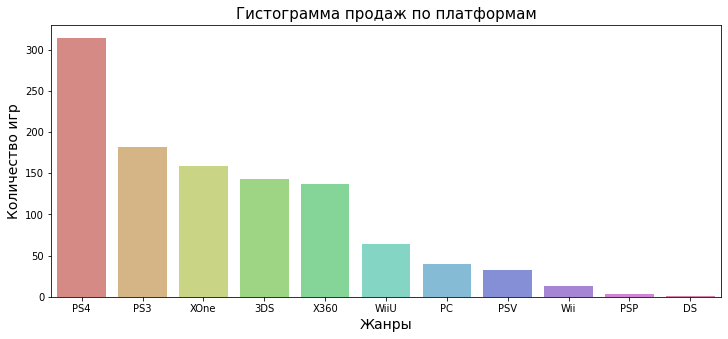

In [46]:
# Гистограмма продаж всех платформ за актуальный период
plt.figure(figsize=(12,5))
plt.title('Гистограмма продаж по платформам',fontsize=15)
sns.barplot(data=actual_platform_sales, x=actual_platform_sales.index, y='total_sales', palette='hls', alpha=0.8)
sns.set_style('darkgrid')
plt.xlabel('Жанры',fontsize=14)
plt.ylabel('Количество игр',fontsize=14)
plt.show()

In [47]:
# Выбираем несколько потенциально прибыльных платформ за выбранный актуальный период с 2013 по 2016 года включительно

# Пороговое значение для определения лидирующих платформ по продажам - их медиана продаж 
threshold_value = actual_platform_sales['total_sales'].median()
lead_platform_sales_threshold = actual_platform_sales.query('total_sales > @threshold_value')
lead_platform_sales_threshold.index

# Срез потенциально прибыльных платформ за выбранный актуальный период с 2013 по 2016 года 
actual_data = data.query('year_of_release >= 2013 & platform in @lead_platform_sales_threshold.index').reset_index(drop=True)
display(actual_data.head(10), actual_data.tail(1))
#actual_data.info()
#actual_data['platform'].unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,lost,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,lost,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,lost,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1.0,-1.0,lost,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1472,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.01,0.0,-1.0,-1.0,lost,0.01


In [48]:
# Проверяем, что платформы выбраны за актуальный период
best_platformfs=actual_data.groupby('platform').agg(min_year_actual=('year_of_release', np.min), \
                                                    total_sales=('total_sales', np.sum)) \
.sort_values(by='total_sales',ascending=False)

In [49]:
display(pd.DataFrame({'Потенциально прибыльные платформы с 2013 по 2016 годы':best_platformfs.index}))

,Потенциально прибыльные платформы с 2013 по 2016 годы
0,PS4
1,PS3
2,XOne
3,3DS
4,X360


####  Вывод 3.3    

Исходя из анализа продаж по платформам за период с 2013 по 2016 годы включительно можно предположить наболее потенцильно прибыльные платформы: PS4, PS3, XOne, 3DS, X360.

Выбранные за актуальный период платформы имеют тенденцию к снижению общей суммы продаж к 2016 году (у всех выбранных платформ начиная с 2015 года), что дополнительно может быть связано с отсутствием полной корректной информаци к моменту выгрузки данных - для накопления  более полной статистики нужен определенный временной лаг. К тому же в целом индустрия игр в последние годы стала угасать. У всех платформ, кроме PS4 и 3DS, продажи с 2013 года ежегодно падали, у указанных - падение с 2015 года.   

 

####  3.4   Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за период 2013-2016 годы.

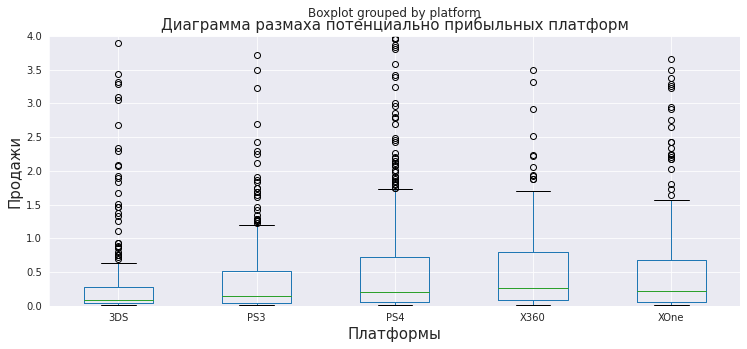

In [50]:
# Диаграмма размаха по продажам игр в разбивке по платформам
box = actual_data
box.boxplot(column='total_sales', by='platform', figsize = (12, 5)) 
plt.title('Диаграмма размаха потенциально прибыльных платформ',fontsize=15)
plt.xlabel('Платформы',fontsize=15)
plt.ylabel('Продажи',fontsize=15)
plt.ylim(0,4)
plt.show()

####  Вывод 3.4     
Медианы продаж разных платформ близки друг к другу. Более стабильные продажи показывают платформы 3DS и PS3. Больше прибыли могут принести платформы PS4 и X360 - их 3й квартиль выше остальных, а значит и вероятность, что продаж будет больше, - выше. 

####  3.5 Проверка влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.

In [51]:
# Срез из актуальных данных без заглушек пользователей
usr_data = actual_data.query('user_score != -1').reset_index(drop=True)
usr_data.query('user_score == -1').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [52]:
usr_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
843,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
844,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
845,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1.0,6.6,E,0.01
846,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-1.0,5.1,E10+,0.01


In [53]:
# Срез из актуальных данных без заглушек критиков
critic_data = actual_data.query('critic_score != -1').reset_index(drop=True)
critic_data.query('critic_score == -1').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [54]:
critic_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
689,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
690,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01
691,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
692,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01


In [55]:
# Найдем самую популярную платформу среди пользователей
pop_usr_platform = usr_data.groupby('platform')['user_score'].sum().idxmax()
print(f'Самая популярная платформа среди пользователей: {pop_usr_platform}')

Самая популярная платформа среди пользователей: PS4


Наиболее популярна платформа PS4 - среди пользователей она получила наибольшую оценку из актуальных платформ

In [56]:
# Срезы актуального датасета по платформе PS4 без заглушек
usr_pop_data = usr_data.query('platform == @pop_usr_platform')#.reset_index(drop=True)
critic_pop_data = critic_data.query('platform == @pop_usr_platform')#.reset_index(drop=True)
display(usr_pop_data[132:136], critic_pop_data[132:136])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
479,Onechanbara Z2: Chaos,PS4,2014,Action,0.14,0.03,0.04,0.04,57.0,6.5,M,0.25
482,Samurai Warriors 4,PS4,2014,Action,0.08,0.07,0.06,0.03,76.0,8.1,T,0.24
485,Destiny: The Collection,PS4,2016,Shooter,0.05,0.15,0.00,0.04,-1.0,8.1,T,0.24
489,NBA Live 14,PS4,2013,Sports,0.15,0.05,0.00,0.04,43.0,2.7,E,0.24


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
396,Onechanbara Z2: Chaos,PS4,2014,Action,0.14,0.03,0.04,0.04,57.0,6.5,M,0.25
399,Samurai Warriors 4,PS4,2014,Action,0.08,0.07,0.06,0.03,76.0,8.1,T,0.24
404,NBA Live 14,PS4,2013,Sports,0.15,0.05,0.00,0.04,43.0,2.7,E,0.24
406,NBA Live 15,PS4,2014,Sports,0.16,0.04,0.00,0.04,59.0,5.6,E,0.24


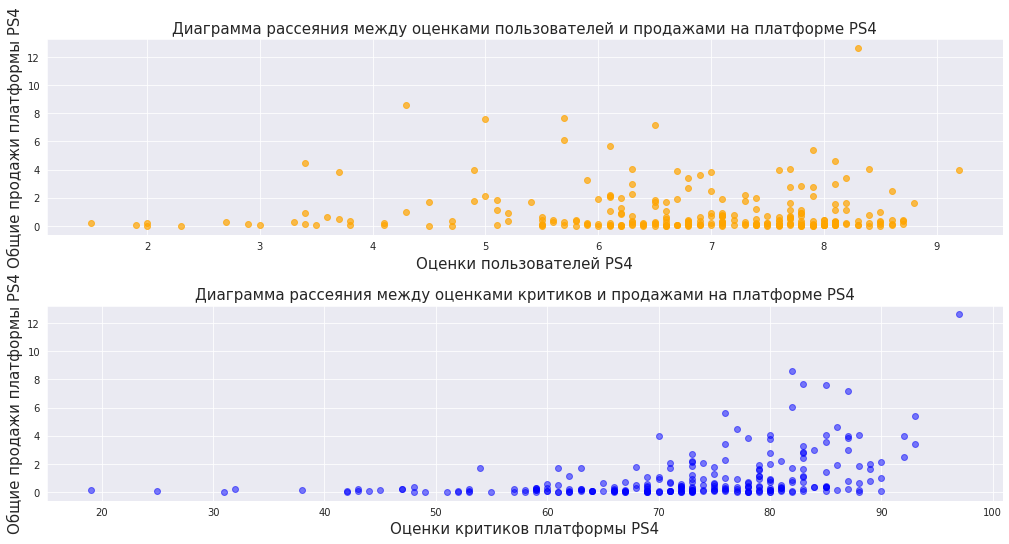

In [57]:
# Диаграммы рассеяния наиболее популярной платформы PS4 оценок пользователей, критиков и продаж
fig, ax = plt.subplots(2, figsize=(14, 7))
fig. tight_layout (h_pad= 5)
ax[0].scatter(x = usr_pop_data['user_score'], y = usr_pop_data['total_sales'], alpha = 0.7, color = 'orange')
ax[0].set_xlabel(f'Оценки пользователей {pop_usr_platform}',fontsize=15)
ax[0].set_ylabel(f'Общие продажи платформы {pop_usr_platform}',fontsize=15)
ax[0].set_title(f'Диаграмма рассеяния между оценками пользователей и продажами на платформе {pop_usr_platform}',fontsize=15)

ax[1].scatter(x = critic_pop_data['critic_score'], y = critic_pop_data['total_sales'], alpha = 0.5, color = 'blue')
ax[1].set_xlabel(f'Оценки критиков платформы {pop_usr_platform}',fontsize=15)
ax[1].set_ylabel(f'Общие продажи платформы {pop_usr_platform}',fontsize=15)
ax[1].set_title(f'Диаграмма рассеяния между оценками критиков и продажами на платформе {pop_usr_platform}',fontsize=15)
plt.show()

In [58]:
# Коэффициент корреляции между оценками пользователей и продажами на платформе PS4
corr_usr = round(usr_pop_data['user_score'].corr(usr_pop_data['total_sales']),2)
print(f'Коэффициент корреляции между оценками пользователей и продажами на платформе {pop_usr_platform}', corr_usr)

Коэффициент корреляции между оценками пользователей и продажами на платформе PS4 -0.03


In [59]:
# Коэффициент корреляции между оценками критиков и продажами на платформе PS4
corr_critic = round(critic_pop_data['critic_score'].corr(critic_pop_data['total_sales']),2)
print(f'Коэффициент корреляции между оценками критиков и продажами на платформе {pop_usr_platform}', corr_critic)

Коэффициент корреляции между оценками критиков и продажами на платформе PS4 0.41


####  Вывод 3.5
Наиболее популярна платформа PS4 - среди пользователей она получила наибольшую оценку из актуальных платформ.  
Коэффициент корреляции между продажами на платформе PS4 и
-  оценками пользователей равен -0.03
-  оценками критиков равен 0.41  

Рассчитанный коэффициент корреляции показывает, что оценки пользователей не влияют на продажи игр платформы PS4. Коэфициент корреляции оценок критиков показывает слабую положительную зависимость продаж от их оценок.  

####  3.6 Сравнение с продажами игр на других потенциально прибыльных платформах за период 2013-2016 годы.

In [60]:
# Функция вычисляющая корреляции между продажами на платформе и оценками критиков и пользователей, на входе - название платформы
try:
    def corr_func (name_plaform):
#        pop_data = actual_data.query('platform == @name_plaform').reset_index(drop=True)

        usr_data_loc =  usr_data.query('platform == @name_plaform').reset_index(drop=True)
        critic_data_loc = critic_data.query('platform == @name_plaform').reset_index(drop=True)
        corr_usr = round(usr_data_loc['user_score'].corr(usr_data_loc['total_sales']),2)
        corr_critic = round(critic_data_loc['critic_score'].corr(critic_data_loc['total_sales']),2)
        print(f'Коэффициент корреляции между продажами на платформе {name_plaform} \n и оценками пользователей:',corr_usr,'\n', 'и между оценками критиков:', corr_critic,'\n')
        
except:
    print('Параметры функции - название прибыльной платформы, по которой необходимо посчитать корреляцию, указывается в кавычках')

In [61]:
# Вывод коэффициентов корреляций потенциально прибыльных платформ
list(map(lambda x: corr_func(x) , best_platformfs.index))

Коэффициент корреляции между продажами на платформе PS4 
 и оценками пользователей: -0.03 
 и между оценками критиков: 0.41 

Коэффициент корреляции между продажами на платформе PS3 
 и оценками пользователей: 0.0 
 и между оценками критиков: 0.33 

Коэффициент корреляции между продажами на платформе XOne 
 и оценками пользователей: -0.07 
 и между оценками критиков: 0.42 

Коэффициент корреляции между продажами на платформе 3DS 
 и оценками пользователей: 0.24 
 и между оценками критиков: 0.36 

Коэффициент корреляции между продажами на платформе X360 
 и оценками пользователей: -0.01 
 и между оценками критиков: 0.35 



[None, None, None, None, None]

In [62]:
# Функция вывода диаграмм рассеяния продаж потенциально прибыльной платформы и оценок пользователей и критиков
try:
    def scatter_func (name_plaform):
        usr_data_loc =  usr_data.query('platform == @name_plaform').reset_index(drop=True)
        critic_data_loc = critic_data.query('platform == @name_plaform').reset_index(drop=True)
                
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f'Диаграмма рассеяния платформа {name_plaform}',fontsize=15)
        fig. tight_layout (h_pad= 5)
        
        ax[0].scatter(x = usr_data_loc['user_score'], y = usr_data_loc['total_sales'], alpha = 0.7, color = 'orange')
        ax[0].set_xlabel(f'Оценки пользователей {name_plaform}',fontsize=15)
        ax[0].set_ylabel(f'Общие продажи платформы {name_plaform}',fontsize=15)

        ax[1].scatter(x = critic_data_loc['critic_score'], y = critic_data_loc['total_sales'], alpha = 0.5, color = 'blue')
        ax[1].set_xlabel(f'Оценки критиков платформы {name_plaform}',fontsize=15)

        plt.show()
except:
    print('Параметры функции - название потенциально прибыльной платформы, по которой необходимо построить диаграмму, указывается в кавычках')

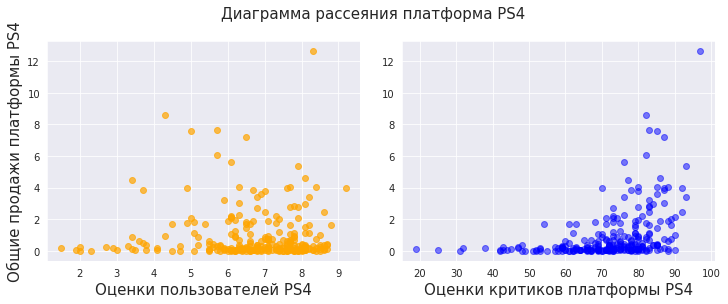

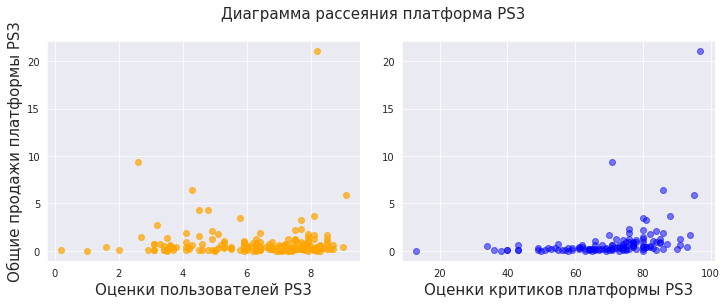

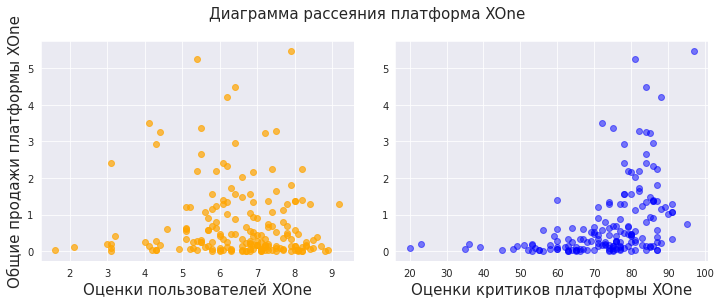

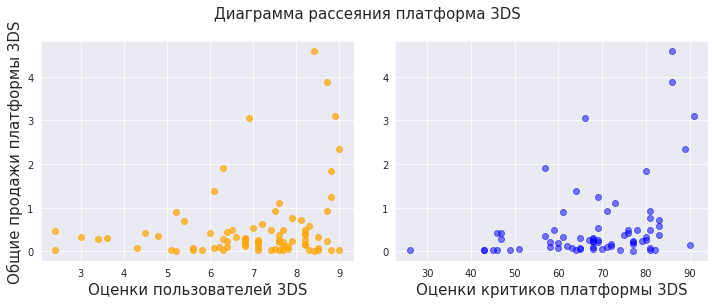

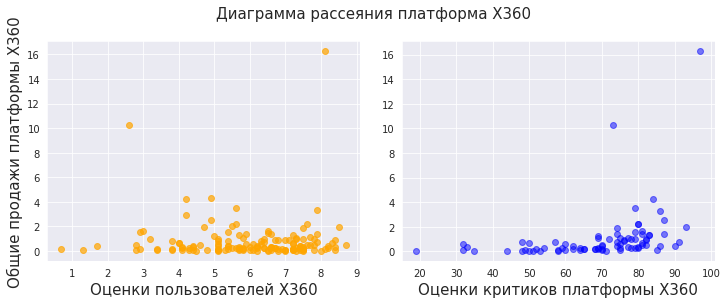

[None, None, None, None, None]

In [63]:
# Выводим диаграммы рассеяния по всем потенциально прибыльным платформам
list(map(lambda x: scatter_func(x) , best_platformfs.index))

In [64]:
best_platformfs

,min_year_actual,total_sales
platform,,
PS4,2013,314.14
PS3,2013,181.43
XOne,2013,159.32
3DS,2013,143.25
X360,2013,136.80


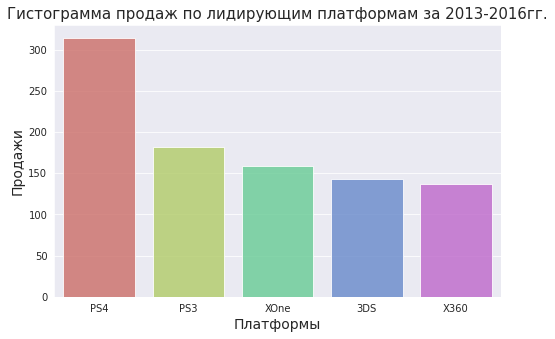

In [65]:
# Гистограмма продаж потенциально прибыльных платформ за 2013-2016гг.
plt.figure(figsize=(8,5))
plt.title('Гистограмма продаж по лидирующим платформам за 2013-2016гг.',fontsize=15)
sns.barplot(data=best_platformfs, x=best_platformfs.index, y='total_sales', palette='hls', alpha=0.8)
sns.set_style('darkgrid')
plt.xlabel('Платформы',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.show()

In [66]:
# Доля продаж лидирующих платформ к максимальному значнию самой популярной PS4: 314 млн.
to_max = 100*best_platformfs['total_sales']/best_platformfs['total_sales'].max()
display(pd.DataFrame(to_max))

,total_sales
platform,
PS4,100.000000
PS3,57.754504
XOne,50.716241
3DS,45.600688
X360,43.547463


####  Вывод 3.6

Платформа PS4 является самой популярной и имеет отрыв в продажах от остальных лидирующих платформ более, чем 30%. Несмотря на это, картина зависимости продаж от оценок схожа с остальными лдирующми платформами.
У всех лидирующих платформ, как и у PS4, рассчитанный коэффициент корреляции Пирсона между продажами и оценками критиков  находтся в диапазоне от 0.3 до 0.42. Коэффициент корреляции между продажами и оценками пользователей у всех платформ, кроме 3DS: не превышает 0.1.

Коэффициент корреляции между продажами на платформе PS4 
 и оценками пользователей: -0.03 
 и между оценками критиков: 0.41 

Коэффициент корреляции между продажами на платформе PS3 
 и оценками пользователей: 0.0 
 и между оценками критиков: 0.33 

Коэффициент корреляции между продажами на платформе XOne 
 и оценками пользователей: -0.07 
 и между оценками критиков: 0.42 

Коэффициент корреляции между продажами на платформе 3DS 
 и оценками пользователей: 0.24 
 и между оценками критиков: 0.36 

Коэффициент корреляции между продажами на платформе X360 
 и оценками пользователей: -0.01 
 и между оценками критиков: 0.35 

Диаграммы рассеяния и коэффициенты корреляции Пирсона позволяют заключить, что
 - оценки критиков слабо влияют на продажи платформ PS4, XOne, 3DS и X360, и их продажи совершенно не завсят от оценок пользователей
 - лишь покупатели платформы 3DS слабо, но реагируют и на оценки критиков и на оценки пользоваелей одновремено - у этой платформы зависимость продаж от оценок выше, чем в остальных платформах.
В целом, покупатели слабо склонны прислушиваться к мнению экспертов, и не склонны - ко мнению пользователей, поэтому данный критерий не будет существенным при выборе популярного продукта для рекламной кампании на 2017г.

####  3.7 Общее распределение игр по жанрам,  прибыльные жанры.

In [67]:
# Какие жанры представлены в данных
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [68]:
# Распределение игр по жанрам
game_genre = pd.DataFrame(actual_data.groupby('genre')['name'].count().sort_values(ascending=False))
game_genre

,name
genre,
Action,521
Role-Playing,184
Sports,170
Shooter,145
Adventure,110
Misc,98
Racing,64
Fighting,63
Platform,47


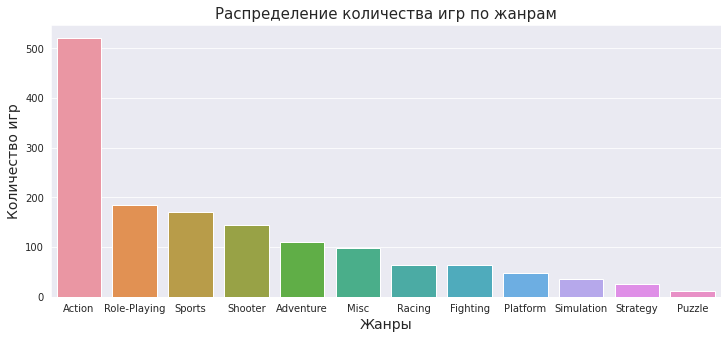

In [69]:
# Гистограмма распределения количества игр по жанрам 
plt.figure(figsize=(12,5))
sns.barplot(x=game_genre.index, y='name', data=game_genre)
sns.set_style('whitegrid')
plt.title('Распределение количества игр по жанрам',fontsize=15)
plt.xlabel('Жанры',fontsize=14)
plt.ylabel('Количество игр',fontsize=14)
plt.show()

In [70]:
# Посчитаем продажи в каждом жанре
sale_genre = pd.DataFrame( actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False))
sale_genre

,total_sales
genre,
Action,285.96
Shooter,216.22
Sports,142.48
Role-Playing,127.83
Misc,43.57
Racing,31.46
Fighting,27.91
Platform,22.88
Adventure,18.59


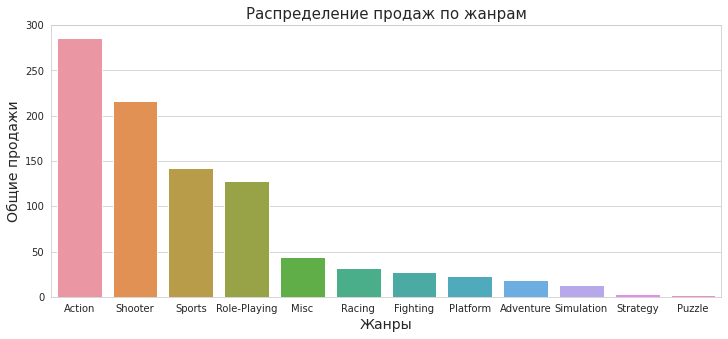

In [71]:
# Гистограмма распределения продаж по жанрам 
plt.figure(figsize=(12,5))
sns.barplot(x=sale_genre.index, y='total_sales', data=sale_genre)
sns.set_style('whitegrid')
plt.title('Распределение продаж по жанрам',fontsize=15)
plt.xlabel('Жанры',fontsize=14)
plt.ylabel('Общие продажи',fontsize=14)
plt.show()

In [72]:
# Средняя прибыльность игры в жанре
rate_genre=pd.DataFrame({'rate_genre': sale_genre['total_sales']/game_genre['name']}).sort_values(by='rate_genre', ascending = False)
rate_genre

,rate_genre
genre,
Shooter,1.491172
Sports,0.838118
Role-Playing,0.694728
Action,0.548868
Racing,0.491563
Platform,0.486809
Misc,0.444592
Fighting,0.443016
Simulation,0.372857


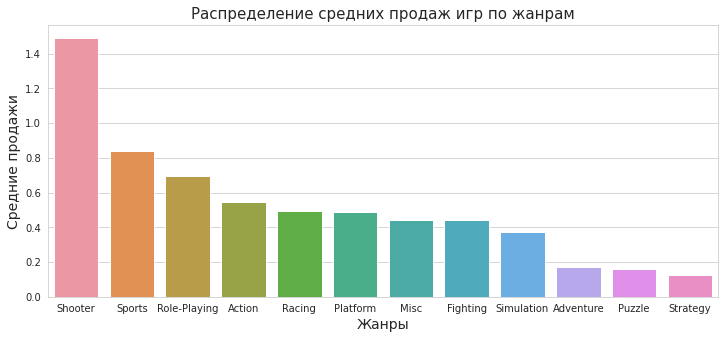

In [73]:
# Гистограмма распределения средних продаж игр по жанрам 
plt.figure(figsize=(12,5))
sns.barplot(x=rate_genre.index, y='rate_genre', data=rate_genre)
sns.set_style('whitegrid')
plt.title('Распределение средних продаж игр по жанрам',fontsize=15)
plt.xlabel('Жанры',fontsize=14)
plt.ylabel('Средние продажи',fontsize=14)
plt.show()

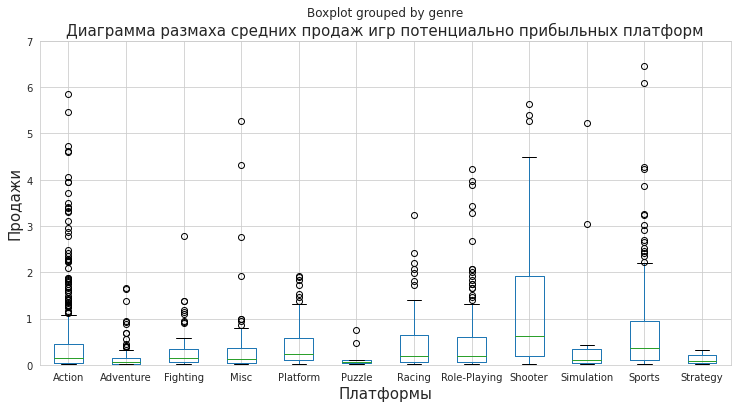

In [74]:
# Диаграмма размаха средних продаж игр в разбивке по жанрам
actual_data.boxplot(column='total_sales', by='genre', figsize = (12, 6)) 
plt.title('Диаграмма размаха средних продаж игр потенциально прибыльных платформ',fontsize=15)
plt.xlabel('Платформы',fontsize=15)
plt.ylabel('Продажи',fontsize=15)
plt.ylim(0,7)
sns.set_style('darkgrid')
plt.show()

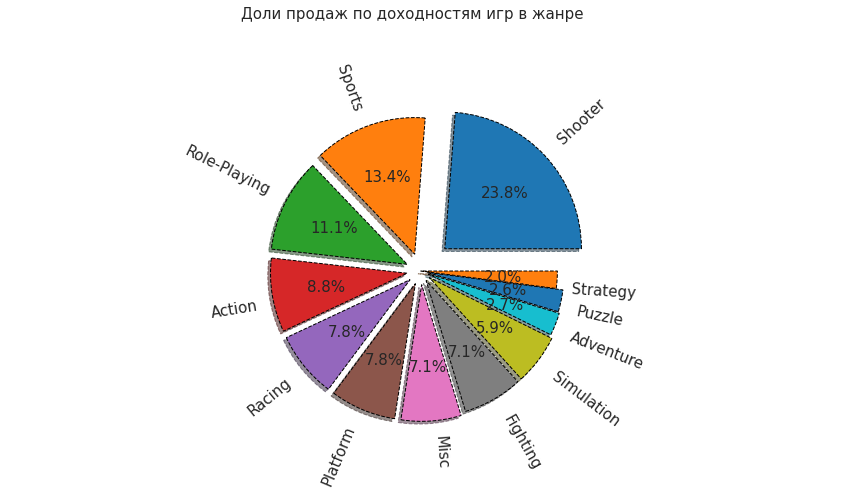

In [75]:
# Доли продаж по доходностям игр в жанре 
explode = (0.24, 0.13, 0.11, 0.1, 0.1, 0.1, 0.1, 0.08, 0.08, 0.06, 0.05, 0)
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle('Доли продаж по доходностям игр в жанре',fontsize=15)
plt.subplots_adjust(top= 0.8)

ax.pie(rate_genre['rate_genre'], labels=rate_genre.index, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, \
       explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis('equal')
plt.show()


#### Вывод 3.7
Топ-3 по количеству игр в жанре занимают: Action, Role-Playing и Sports.  
Топ-3 по продажам в жанре: Action, Shooter и Sports.

В ходе анализа выяснилось, что наиболее выгодно продавать игры жанра Shooter - его медианные продажи выше, чем в остальных. Каждая игра жанра Shooter приносит в среднем стабильно больше прибыли, чем игра в любом другом жанре. В Shooter общее количество продаж меньше, чем в Action, но и количества игр там меньше.
Топ-3 по доходности игр в жанре занимают (суммарно 48%):
- Shooter 23,8% 
- Sports 13,4%  
- Role-Playing 11.1%  
Стоит учесть это при планировании бюджета на рекламу в 2017г. при выборе конкретной игры.

### 4. Составим портрет пользователя каждого региона

#### 4.1 Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы и жанры (топ-5). Опишем различия в долях продаж.


In [76]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [77]:
# Словарь регионов
dict_regions = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'
                }

In [78]:
# Словарь признаков, по которым исследуется популярность топ-5
dict_feature = {'platform': 'Платформы', 'genre': 'Жанры'
        }

In [79]:
# Функция
# - формирующая и выводящая таблицу продаж по регионам, сгруппированную по заданному признаку,
# - формирующая и выводящая таблицу и графики (с долями) топ-5 (по продажам) самых популярных объектов заданного признака для каждого региона
# - на вход принимаеет значение признака из словаря признаков (точное, как имя признака в колонке данных),
# по которому исследуется популярность топ-5, указывается в кавычках

try:
    def best_in_region (feature_name):
        # Таблица продаж по регионам, сгруппированная по заданному признаку
        feature_region = data.query('year_of_release >= 2013').groupby(feature_name).agg(na_sales=('na_sales', np.sum),
                                            eu_sales =('eu_sales', np.sum),
                                            jp_sales=('jp_sales', np.sum),
                                                                        )
        #print(dict_feature[feature_name],': таблица продаж в каждом регионе')
        #display(feature_region)
        for col_name in dict_regions:     
            # Таблица топ-5 самых популярных признаков в каждом регионе
            df_sale = pd.DataFrame(feature_region[col_name].sort_values(ascending = False).head(5))
            df_sale['rate'] = round(100*df_sale/df_sale.sum(),0)
            print(dict_feature[feature_name],': таблица топ-5 продаж в каждом регионе')
            display(df_sale)
            
            # Графики топ-5 признака для каждого региона
            #fig, axes = plt.subplots(1, 3, figsize=(24, 5))
            plt.figure(figsize=(8,3))
            sns.barplot(x=df_sale.index, y=col_name, data=df_sale, palette='hls', alpha=0.8)
            sns.set_style('whitegrid')
            plt.title(f'{dict_feature[feature_name]}: топ-5 лучших в регионе {dict_regions[col_name]}', fontsize=15)
            plt.xlabel(dict_feature[feature_name], fontsize=14)
            plt.ylabel('Продажи', fontsize=14)
            plt.show()
            sns.set()  
            
            # Доли продаж по признаку 
            explode = (0.23, 0.13, 0.11, 0.1, 0)
            fig, ax = plt.subplots(figsize=(13, 5))
            fig.suptitle(f'{dict_feature[feature_name]}: доли продаж топ-5 в регионе {dict_regions[col_name]}',fontsize=15)
            plt.subplots_adjust(top= 0.8)

            ax.pie(df_sale[col_name], labels=df_sale.index, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, \
                   explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
            ax.axis('equal')
            plt.show()
except:
    print('Параметры функции - название признака (точное, как имя признака в колонке данных), по которому исследуется популярность топ-5, указывается в кавычках')


Платформы : таблица топ-5 продаж в каждом регионе


,na_sales,rate
platform,,
PS4,108.74,28.0
XOne,93.12,24.0
X360,81.66,21.0
PS3,63.50,16.0
3DS,38.20,10.0


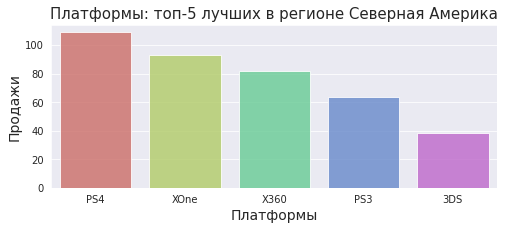

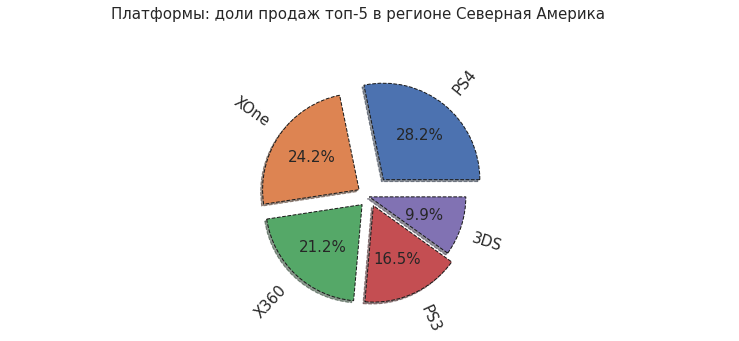

Платформы : таблица топ-5 продаж в каждом регионе


,eu_sales,rate
platform,,
PS4,141.09,42.0
PS3,67.81,20.0
XOne,51.59,15.0
X360,42.52,13.0
3DS,30.96,9.0


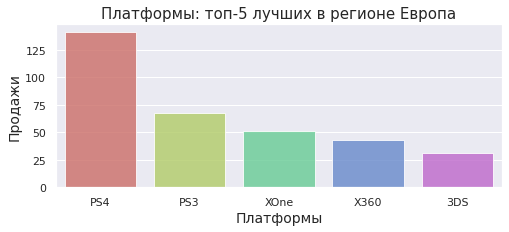

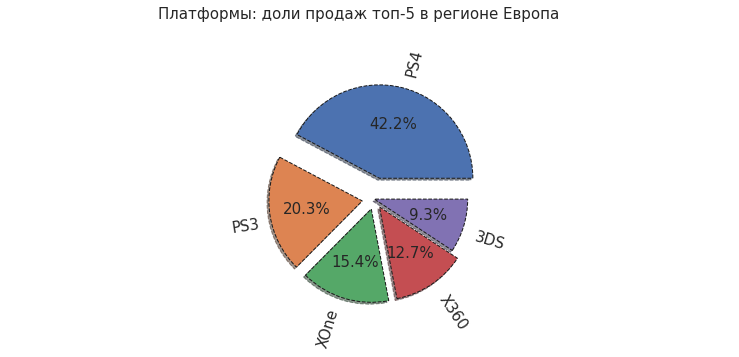

Платформы : таблица топ-5 продаж в каждом регионе


,jp_sales,rate
platform,,
3DS,67.81,50.0
PS3,23.35,17.0
PSV,18.59,14.0
PS4,15.96,12.0
WiiU,10.88,8.0


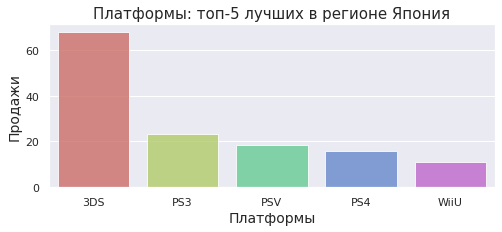

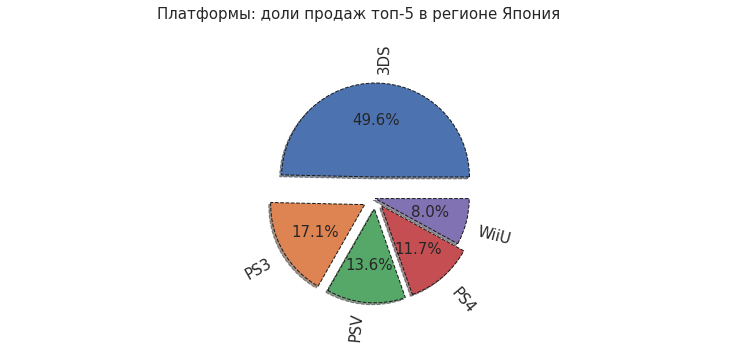

In [80]:
# Топ-5 самых популярных платформ в каждом из рассматриваемых регионов
best_in_region ('platform')

Жанры : таблица топ-5 продаж в каждом регионе


,na_sales,rate
genre,,
Action,126.05,34.0
Shooter,109.74,29.0
Sports,65.27,17.0
Role-Playing,46.40,12.0
Misc,27.49,7.0


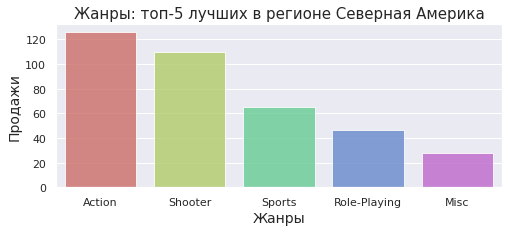

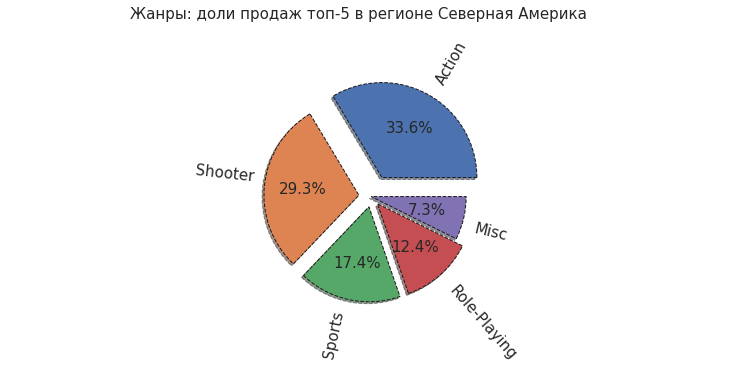

Жанры : таблица топ-5 продаж в каждом регионе


,eu_sales,rate
genre,,
Action,118.13,36.0
Shooter,87.86,27.0
Sports,60.52,19.0
Role-Playing,36.97,11.0
Racing,20.19,6.0


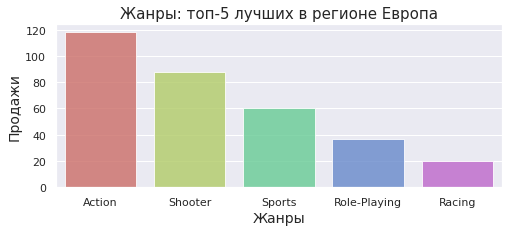

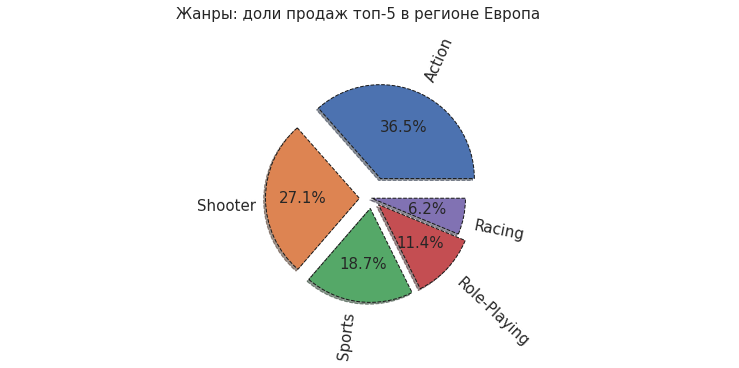

Жанры : таблица топ-5 продаж в каждом регионе


,jp_sales,rate
genre,,
Role-Playing,51.04,44.0
Action,40.49,35.0
Misc,9.20,8.0
Fighting,7.65,7.0
Shooter,6.61,6.0


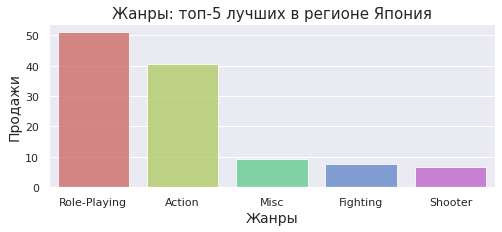

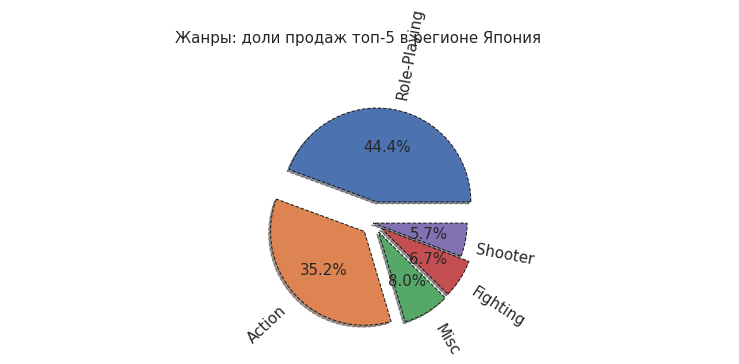

In [81]:
# Топ-5 самых популярных жанров в каждом из рассматриваемых регионов
best_in_region ('genre')

#### 4.2 Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе.

In [82]:
# Таблица продаж по рейтингам в разных регионах
rating_region_sale = pd.DataFrame(data.query('year_of_release >= 2013').groupby('rating').agg(na_sales=('na_sales', np.sum),
                                            eu_sales =('eu_sales', np.sum),
                                            jp_sales=('jp_sales', np.sum)))
rating_region_sale                                           

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
lost,89.42,78.91,85.05


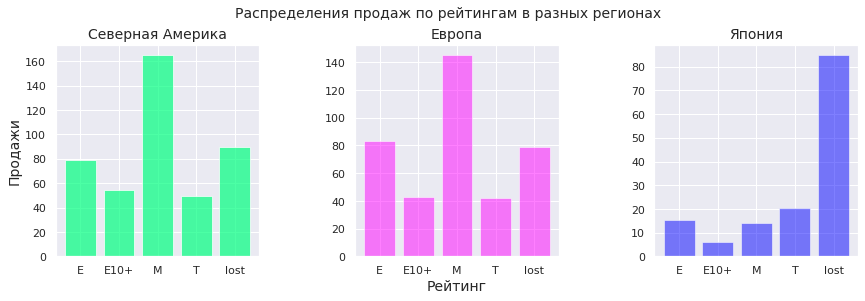

In [83]:
# Гистограммы распределения продаж по рейтингам в разных регионах
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Распределения продаж по рейтингам в разных регионах',fontsize=14)
fig. tight_layout (w_pad= 5)

ax1.bar(rating_region_sale.index, rating_region_sale['na_sales'], color='springgreen', alpha=0.7)
ax1.set_ylabel('Продажи',fontsize=14)
ax1.set_title('Северная Америка',fontsize=14)
ax2.bar(rating_region_sale.index, rating_region_sale['eu_sales'], color='magenta', alpha=0.5)
ax2.set_xlabel('Рейтинг',fontsize=14)
ax2.set_title('Европа',fontsize=14)
ax3.bar(rating_region_sale.index, rating_region_sale['jp_sales'], color='blue', alpha=0.5)
ax3.set_title('Япония',fontsize=14)

plt.show()

#### Вывод 4
В период c 2013 по 2016 год  

Для пользователей **Северной Америки**
самые продаваемые игры получали от ESRB рейтинг «M» «Для взрослых», на втором месте игры с рейтингом "lost", то есть не получившие рейтинга, на третьем месте - с рейтингом «E» «Для всех».  

Для пользователей **Европы**
картина схожая, самые продаваемые - с рейтингом «M» «Для взрослых», на втором месте - с рейтингом «E» «Для всех», на третьем - игры с рейтингом "lost".   

Для пользователей **Японии**
результаты другие, самые продаваемые игры с большим отрывом от остальных - с рейтингом «lost», на втором месте - «T» «Для подростков», на третьем - «E» «Для всех». Наиболее очевидное предположение, что среди игр лидирующее место в Японии занимает категория «lost» ввиду того, что многие игры не оценивались ESRB, так как Япония имеет свою рейтинговую организацию игр CERO.

Во всех регионах можно выделить наиболее популярные рейтинги - в топ-3 каждого присутствуют «lost» (игры с пропущенными рейтингами) и «E» «Для всех». Возможно, не во всех открытых источниках, з которых собирался арфив продаж игр, хранились данные с оценкми.

Более схожи между собой пользователи Северной Америки и Европы. У них одинаковые игровые платформы в топ-5 по их продажам, хоть и с разными долями продаж, а на первом месте у пользователей обоих регионов платформа PS4. По лидирующим жанрам они также близки - первые 3 места занимают в одинаковой чередности Action, Shooter и Sport.
Скорее всего это связано с более схожей культурой между ними, чем с пользователями Японии.

| | Топ 5 платформ | Топ 5 жанров    |
|---:|:-------------|:-----------|
| Северная Америка | | |
| 1 | PS4   | Action   |
| 2 | XOne   | Shooter   |
| 3 | X360   | Sports   |
| 4 | PS3   | Role-Playing   |
| 5 | 3DS   | Misc   |
| Европа |
| 1 | PS4   | Action   |
| 2 | PS3   | Shooter   |
| 3 | XOne   | Sports   |
| 4 | X360   | Role-Playing   |
| 5 | 3DS   | Racing   |
| Япония |
| 1 | 3DS   | Role-Playing   |
| 2 | PS3   | Action   |
| 3 | PSV   | Misc   |
| 4 | PS4   | Fighting   |
| 5 | WiiU   | Shooter  |  M  ||


### 5. Проверим гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:  
**Нулевая гипотеза H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
**Альтернативная гипотеза H1**: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [84]:
# Средний пользовательский рейтинг платформы Xbox One
xbox_score = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013) & (data['user_score'] != -1)]['user_score']
print(f' Средний пользовательский рейтинг платформы Xbox One: {round(xbox_score.mean(),2)}')

 Средний пользовательский рейтинг платформы Xbox One: 6.52


In [85]:
# Средний пользовательский рейтинг платформы PC
pc_score = data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013) & (data['user_score'] != -1)]['user_score']
print(f' Средний пользовательский рейтинг платформы Xbox One: {round(pc_score.mean(),2)}')

 Средний пользовательский рейтинг платформы Xbox One: 6.27


In [86]:
# Количество оценок в совокупности платформы Xbox One
print(f' Количество пользовательских оценок платформы Xbox One: {xbox_score.count()}')

 Количество пользовательских оценок платформы Xbox One: 182


In [87]:
# Количество оценок в совокупности платформы PC
print(f' Количество пользовательских оценок платформы PC: {pc_score.count()}')

 Количество пользовательских оценок платформы PC: 155


In [88]:
alpha = 0.03 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox_score, 
    pc_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:  
**Нулевая гипотеза H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
**Альтернативная гипотеза H1**: Средние пользовательские рейтинги жанров Action и Sports разные

In [89]:
# Средний пользовательский рейтинг жанра Action
action_score = data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013) & (data['user_score'] != -1)]['user_score']
print(f' Средний пользовательский рейтинг жанра Action: {round(action_score.mean(),2)}')

 Средний пользовательский рейтинг жанра Action: 6.84


In [90]:
# Средний пользовательский рейтинг жанра Sports
sports_score = data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013) & (data['user_score'] != -1)]['user_score']
print(f' Средний пользовательский рейтинг жанра Sports: {round(sports_score.mean(),2)}')

 Средний пользовательский рейтинг жанра Sports: 5.24


In [91]:
# Количество оценок в совокупности жанра Action
print(f' Количество пользовательских оценок жанра Action: {action_score.count()}')

 Количество пользовательских оценок жанра Action: 389


In [92]:
# Количество оценок в совокупности жанра Sports
print(f' Количество пользовательских оценок жанра Sports: {sports_score.count()}')

 Количество пользовательских оценок жанра Sports: 160


In [93]:
alpha = 0.03 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sports_score, 
    action_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


#### Вывод 5
Были сформулированы двусторонние гипотезы, так как следовало проверить именно одинаковость средних 2х совокупностей, а не какая больше (или меньше) другой. Так как оценок более 30 в каждой из выборок и выборки независимые, для проверки гипотезы о равенстве их средних был выбран метод t-тест.  

Для проверки на равенство средних пользовательских рейтингов платформ Xbox One и PC были сформулированы гипотезы:  
**Нулевая гипотеза H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
**Альтернативная гипотеза H1**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.  
По результатам t-теста не получилось отвергнуть нулевую гипотезу, p-значение 14%, то есть средних пользовательские рейтингов платформ Xbox One и PC одинаковые: вероятность случайно получить разные средние составила 14%, что больше заданного нами порога в 3%.  

Для проверки на равенство средних пользовательских рейтингов жанров Action и Sports были сформулированы гипотезы:  
**Нулевая гипотеза H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
**Альтернативная гипотеза H1**: Средние пользовательские рейтинги жанров Action и Sports разные.
По результатам t-теста отвергнули нулевую гипотезу, p-значение получено близкое к нулю, то есть средних пользовательских рейтингов жанров Action и Sports разные: вероятность случайно получить разные средние оказалась близкой к нулю, что меньше заданного нами порога в 3%.

### Общий вывод 

Было проведено исследование продаж компьютерных игр за период с 1980 по 2016 гг. включительно. Информация была взята из открытых источников.


Исследование состояло из следующих этапов:
- Изучение общей информации о данных.
- Подготовка данных
- Исследовательский анализ данных
- Составление портрета пользователя каждого региона
- Проверка гипотезы
- Общий вывод

>**1. На этапе изучения данных**  

было рассчитано и выявлено следующее.
Всего объектов 16715 (строки) и 11 признаков их описывающих (колонки).  
Набор и содержание признаков соответствует целям исследования.  
Названия колонок несут содержательный смысл.  
Индексы без пропусков.   
Явных дубликатов нет.   

В данных присутствуют  
- разный регистр в названиях колонок
- пропуски в 6 признаках (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating)  
- некорректные типы данных у 2 признаков (Year_of_Release, User_Score)   
- аномальное значение 'tbd' в 15% значений столбца User_Score
- категориальные и количественные признаки.  

Данные представлены за период с 1980 по 2016 года включительно, наименьшее количество игр было выпущено до 1995 года, наибольшее  - за период с 2007 по 2011 год.   
Можно предположить, что 15% игр, не имеющих оценок ползователей - те, у которых в значениях столбца `User_Score` указано To Be Determined (будет определено), - очень давнего года выпуска и\или недавно появившиеся: в обоих случаях возможно еще не собирались оценки от пользователей, либо по причине отсутствия общедоступного интернета у пользователей, либо по причине отсутствия накопившейся статистики от пользователей для недавно выпущенных игр. Не исключено, что не все пользователи пожелали оценить игру, либо не во всех открытых источниках содержались оценки.


>**2. Поэтому перед анализом провели обработку данных:**
  
- разный регистр в названиях колонок привели к нижнему регистру
- заменили на nan неопределенные оценки 'tbd' (To Be Determined - будет определено или подлежит определению), составляющие 15% значений столбца `user_score` для удобства дальнейшей их замены на медианные значения, чтобы не удалять 15% данных,т.к позже оценки еще могут быть получены
- пропуски в 6 признаках (name, year_of_release, genre, critic_score, user_score, rating), которые могли изначально присутствовать в данных, либо могли произойти при загрузке, выгрузке или объединении архивных данных   
    - >удалили в столбцах `name`, `year_of_release`, `genre` по причине их незначительного количества (до 2% в каждом из
      столбцов, эти пропуски могли произойти по технической причине, в т.ч. при объединении архивов данных из старых и новых  хранилищ)  
    - >заменили на медианные значения групп игр в столбцах `critic_score` и `user_score`, т.к. удаление более 40% пропусков в каждом из этих столбцов может исказить результаты исследования, эти пропуски могли произойти по причине, что игра слишком старая и в то время отсутствовала возможность собирать статистику - еще не собирались оценки от пользователей, либо по причине отсутствия общедоступного интернета у них; либо пропуски по причине, что не существовало рейтинговых агенств, либо что игра неактуальная - совсем непопулярна и ее закрывают даже не "распробовав" (слишком жуткая, неинтересная или сложная для понимания ее правил), слишком новая - у недавно выпущенной игры не накопилась еще статистика от пользователей, возможно поэтому и возникли значения 'tbd' в столбце; еще причина -  не исключено, что не все пользователи пожелали оценить игру)  
    - > заменили пропуски в колонке `rating` на слово 'lost',т.к. их большое количество (более 40% в столбце) 
      и удаление может исказить результаты исследования 
- заменили некорректные типы данных у 2 признаков  
    - > в колонке `year_of_release` преобразовали из float в int
    - > в колонке `user_score`- из object в float
- добавили в исходную таблицу столбец суммарных продаж во всех регионах `total_sales`
  
>**3. Проведен исследовательский анализ данных.** 

***Посмотрели, сколько игр выпускалось в разные годы.***  
В более ранние годы игр выпускалось меньше. С 1994 года началась активная тенденция практически ежегодного увеличения количества выпускаемых игр. С 1991г. - неактивный прирост.  
Рост наблюдается до 2009 года.  
В период 1994-2009 небольшое снижение продаж было в 1999, 2003 и 2004 годах.   
Пик релизов приходился на 2008-2009 годы, после которых выпуск начал ежегодно снижаться вплоть до 2016г. за исключением 2015г., возможно, из-за конкуренции со стороны мобильных игр.

***Проанализировали изменения продаж по платформам.***  
Характерный срок существования игр на рынке составил в среднем 8 лет. График наилучших по продажам платформ отражает перод, за который появляются новые и исчезают старые платформы: платформы существуют на рынке от 7 до 11 лет. Пик приходится на 4й-5й год.  
Исходя из проведенного анализа, можно предположть, что актуальный период, позволяющий построить прогноз на 2017 год, стоит выбрать равным с 2013 по 2016 года, так как у наиболее прибыльных платформ с этого года заканчивался их жизненный цикл - они уже не отразят все основные параметры успешных игр, более актуальные факторы в то время могут быть уже неактуальны сегодня, ведь упадок платформ не может 
быть безосновательным. Также с 2013г. начинается новый цикл у более современной успешной платформы PS.  
Наиболее современные, пусть и чуть менее успешные, чем некоторые успешные ушедшие с рынка к 2013 году, платформы помогут более точно выявить определяющие успешность игры закономерности, поэтому для целей дальнейшего исследования выбираем период с 2013г. по 2016г.

***Выбрали несколько потенциально прибыльных платформ за период с 2013 по 2016 года.***  
Исходя из анализа продаж по платформам за период с 2013 по 2016 годы включительно можно предположить наболее потенцильно прибыльные платформы: PS4, PS3, XOne, 3DS, X360.
Выбранные за актуальный период платформы имеют тенденцию к снижению общей суммы продаж к 2016 году (у всех выбранных платформ начиная с 2015 года), что дополнительно может быть связано с отсутствием полной корректной информаци к моменту выгрузки данных - для накопления  более полной статистики нужен определенный временной лаг. К тому же в целом индустрия игр в последние годы стала угасать. У всех платформ, кроме PS4 и 3DS, продажи с 2013 года ежегодно падали, у указанных - падение с 2015 года.   

***Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам за период 2013-2016 годы.***  
Медианы продаж разных платформ близки друг к другу. Более стабильные продажи показывают платформы 3DS и PS3. Больше прибыли могут принести платформы PS4 и X360 - их 3й квартиль выше остальных, а значит и вероятность, что продаж будет больше, - выше.   

***Проверили влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.***  
Наиболее популярна платформа PS4 - среди пользователей она получила наибольшую оценку из актуальных платформ.  
Коэффициент корреляции между продажами на платформе PS4 и
-  оценками пользователей равен -0.03
-  оценками критиков равен 0.41  

Таким образом, оценки пользователей не влияют на продажи игр платформы PS4. Коэфициент корреляции оценок критиков показывает слабую положительную зависимость продаж от их оценок.    

***Сравнили с продажами игр на других платформах.***  
Платформа PS4 является самой популярной и имеет отрыв в продажах от остальных лидирующих платформ более, чем 30%. Несмотря на это, картина зависимости продаж от оценок схожа с остальными лдирующми платформами.
У всех лидирующих платформ, как и у PS4, рассчитанный коэффициент корреляции Пирсона между продажами и оценками критиков  находтся в диапазоне от 0.3 до 0.42. Коэффициент корреляции между продажами и оценками пользователей у всех платформ, кроме 3DS: не превышает 0.1.

Коэффициент корреляции между продажами на платформе PS4 
 и оценками пользователей: -0.03 
 и между оценками критиков: 0.41 

Коэффициент корреляции между продажами на платформе PS3 
 и оценками пользователей: 0.0 
 и между оценками критиков: 0.33 

Коэффициент корреляции между продажами на платформе XOne 
 и оценками пользователей: -0.07 
 и между оценками критиков: 0.42 

Коэффициент корреляции между продажами на платформе 3DS 
 и оценками пользователей: 0.24 
 и между оценками критиков: 0.36 

Коэффициент корреляции между продажами на платформе X360 
 и оценками пользователей: -0.01 
 и между оценками критиков: 0.35 

Диаграммы рассеяния и коэффициенты корреляции Пирсона позволяют заключить, что
 - оценки критиков слабо влияют на продажи платформ PS4, XOne, 3DS и X360, и их продажи совершенно не завсят от оценок пользователей
 - лишь покупатели платформы 3DS слабо, но реагируют и на оценки критиков и на оценки пользоваелей одновремено - у этой платформы зависимость продаж от оценок выше, чем в остальных платформах.
В целом, покупатели слабо склонны прислушиваться к мнению экспертов, и не склонны - ко мнению пользователей, поэтому данный критерий не будет существенным при выборе популярного продукта для рекламной кампании на 2017г.  

***Посмотрели общее распределение игр по жанрам, вычислили прибыльные.***  
Топ-3 по количеству игр в жанре занимают: Action, Role-Playing и Sports.  
Топ-3 по продажам в жанре: Action, Shooter и Sports.

В ходе анализа выяснилось, что наиболее выгодно продавать игры жанра Shooter - его медианные продажи выше, чем в остальных. Каждая игра жанра Shooter приносит в среднем стабильно больше прибыли, чем игра в любом другом жанре. В Shooter общее количество продаж меньше, чем в Action, но и количества игр там меньше.
Топ-3 по доходности игр в жанре занимают (суммарно 48%):
- Shooter 23,8% 
- Sports 13,4%  
- Role-Playing 11.1%  
Стоит учесть это при планировании бюджета на рекламу в 2017г. при выборе конкретной игры.

***Составили портрет пользователя каждого региона***  

В период c 2013 по 2016 год  

Для пользователей **Северной Америки**  
самые продаваемые игры получали от ESRB рейтинг «M» «Для взрослых», на втором месте игры с рейтингом "lost", то есть не получившие рейтинга, на третьем месте - с рейтингом «E» «Для всех».  

Для пользователей **Европы**  
картина схожая, самые продаваемые - с рейтингом «M» «Для взрослых», на втором месте - с рейтингом «E» «Для всех», на третьем - игры с рейтингом "lost".  

Для пользователей **Японии**  
результаты другие, самые продаваемые игры с большим отрывом от остальных - с рейтингом «lost», на втором месте - «T» «Для подростков», на третьем - «E» «Для всех». Наиболее очевидное предположение, что среди игр лидирующее место в Японии занимает категория «lost» ввиду того, что многие игры не оценивались ESRB, так как Япония имеет свою рейтинговую организацию игр CERO.  

Во всех регионах можно выделить наиболее популярные рейтинги - в топ-3 каждого присутствуют «lost» (игры с пропущенными рейтингами) и «E» «Для всех». Возможно, не во всех открытых источниках, из которых собирался архив продаж игр, хранились данные с оценкми.  

Более схожи между собой пользователи Северной Америки и Европы. У них одинаковые игровые платформы в топ-5 по их продажам, хоть и с разными долями продаж, а на первом месте у пользователей обоих регионов платформа PS4. По лидирующим жанрам они также близки - первые 3 места занимают в одинаковой чередности Action, Shooter и Sport. Скорее всего это связано с более схожей культурой между ними, чем с пользователями Японии.  


| | Топ 5 платформ | Топ 5 жанров    |
|---:|:-------------|:-----------|
| Северная Америка | | |
| 1 | PS4   | Action   |
| 2 | XOne   | Shooter   |
| 3 | X360   | Sports   |
| 4 | PS3   | Role-Playing   |
| 5 | 3DS   | Misc   |
| Европа |
| 1 | PS4   | Action   |
| 2 | PS3   | Shooter   |
| 3 | XOne   | Sports   |
| 4 | X360   | Role-Playing   |
| 5 | 3DS   | Racing   |
| Япония |
| 1 | 3DS   | Role-Playing   |
| 2 | PS3   | Action   |
| 3 | PSV   | Misc   |
| 4 | PS4   | Fighting   |
| 5 | WiiU   | Shooter  | ||  


***Проверили гипотезы***  

Были сформулированы двусторонние гипотезы, так как следовало проверить именно одинаковость средних 2х совокупностей, а не какая больше (или меньше) другой. Так как оценок более 30 в каждой из выборок и выборки независимые, для проверки гипотезы о равенстве их средних был выбран метод t-тест.  

Для проверки на равенство средних пользовательских рейтингов платформ Xbox One и PC были сформулированы гипотезы:  
**Нулевая гипотеза H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
**Альтернативная гипотеза H1**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.  
По результатам t-теста не получилось отвергнуть нулевую гипотезу, p-значение 14%, то есть средние пользовательских рейтингов платформ Xbox One и PC одинаковые: вероятность случайно получить разные средние составила 14%, что больше заданного нами порога в 3%.  

Для проверки на равенство средних пользовательских рейтингов жанров Action и Sports были сформулированы гипотезы:  
**Нулевая гипотеза H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
**Альтернативная гипотеза H1**: Средние пользовательские рейтинги жанров Action и Sports разные.  
По результатам t-теста отвергнули нулевую гипотезу, p-значение получено близкое к нулю, то есть средних пользовательских рейтингов жанров Action и Sports разные: вероятность случайно получить разные средние оказалась близкой к нулю, что меньше заданного нами порога в 3%.

***Рекомендуем***  
интернет-магазину «Стримчик» при выборе наиболее популярного продукта для продажи и планирования рекламных кампаний в 2017г. учесть, что в Северной Америке и Европе лучше всего продаются игры на платформе PS4 жанра Action и Shooter с рейтингом от организации ESRB «M» - «Для взрослых», в Японии - игры на платформе 3DS жанра Role-Playing. Наиболее стабильные высокие прибыли приносят игры жанра Shooter.
